## 4. 추측통계의 기본
### - 모집단과 표본
### - 확률 모형
### - 추측통계의 확률

+ 2,3에서 다룬 통계는 기술통계(descriptive statistics)
+ 일부 데이터로부터 전체의 통계적 성질을 추측하는 방식 = 추측통계

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
df = pd.read_csv('ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

#### 1. 모집단과 표본
* 모집단(population): 추측하고 싶은 관측 대상 전체
* 표본(sample): 추측에 사용하는 관측 대상의 일부분
* 표본추출(sampling): 모집단에서 표본을 골라내는 일
* 표본 크기(sample size): 골라낸 표본의 수
* 표본통계량: 표본을 바탕으로 계사난 평균이나 분산, 상관계수 등
* 모수: 모집단의 평균이나 분산, 상관계수 등
* 표본평균으로 모평균을 추측할 때, 표본평균은 모평균의 추정량(estimator)이라 함
* 실제로 표본의 데이터를 이용하여 계산한 결과를 추정갑(estimate)이라 함
* 표본추출 방법
  - 무작위추출(random sampling): 임의로 표본 추출
    + 편향을 없애는 방법이긴 하지만, 그 결과로 편향이 있는 데이터를 얻을 수도 있음
    + 복원추출(sampling with replacement): 여러 차례 동일한 표본을 선택하는 추출
    + 비복원추출(sampling without replacement): 동일한 표본은 한 번만 선택하는 방법
    + 난수 시드(seed): 발생하는 난수의 근원이 되는 숫자
      * 시드를 설정하면 매번 동일한 난수를 얻게 되어 코드의 재현성을 유지할 수 있음

In [5]:
# 무작위추출 
np.random.choice([1,2,3],3) # 기본설정: 복원추출 -> 새로고침할 때마다 다른 결과값

array([2, 1, 3])

In [6]:
# 비복원추출 -> 새로고침해도 같은 결과값
np.random.choice([1,2,3],3,replace=False) 

array([3, 1, 2])

In [7]:
# 난수 시드
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [9]:
# 표본평균
np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean()

70.4

In [10]:
# 모평균
scores.mean()

69.53

In [13]:
# 표본평균 게산을 몇 번 실행해봄
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균',sample.mean())

1번째 무작위추출로 얻은 표본평균 69.15
2번째 무작위추출로 얻은 표본평균 69.5
3번째 무작위추출로 얻은 표본평균 71.35
4번째 무작위추출로 얻은 표본평균 69.4
5번째 무작위추출로 얻은 표본평균 71.5


#### 2. 확률 모형
* 불확정성을 수반한 현상을 해석하기 위해 확률을 사용함
* 확률 모형: 확률을 사용한 무작위추출 혹은 주사위를 모델링한 것
  - 모델링: 현상을 모형처럼 취급하여 특징을 잘 파악하도록 단순화하는 것
* 확률의 기본
  - 확률변수(random variable): 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
  - 시행(trial): 확률변수의 결과를 관측하는 것
  - 실현값(realization): 시행에 의해 관측되는 값
  - 사건(event): 시행 결과로 나타날 수 있는 일
    + 근원사건(elementary event): 더 세부적으로 분해할 수 없는 사건 (ex. 눈이 1)
    + 사건이 서로 배반이라면, 그중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같음
    + 상호배반(mutually exclusive): 각 사건이 동시에는 일어날 수 없다는 것 (ex. "눈이 1 또는 눈이 2 또는 눈이 3"과 "눈이 6")
* 확률분포(probability distribution): 확률변수가 어떻게 움직이는지를 나타낸 것
  - 전체 확률이 1인 확률변수가 취할 수 있는 값이 어떻게 분포하고 있는지 나타낸다고 할 수 있음

In [16]:
# 불공정한 주사위의 확률분포를 구하기 위한 실험
# 불공정한 주사위의 확률분포를 다음과 같이 정의
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [17]:
np.random.choice(dice, p=prob)

5

In [19]:
# 100번 실행
num_trial = 100
sample = np.random.choice(dice,num_trial,p=prob)
sample

array([2, 6, 6, 6, 6, 6, 4, 2, 4, 3, 2, 2, 6, 1, 6, 3, 2, 2, 5, 3, 4, 5,
       6, 6, 3, 2, 2, 4, 3, 4, 5, 5, 3, 4, 3, 6, 2, 5, 6, 6, 3, 4, 5, 3,
       4, 3, 4, 1, 6, 2, 5, 4, 5, 6, 5, 1, 4, 5, 5, 5, 3, 2, 4, 6, 3, 6,
       5, 4, 6, 4, 6, 4, 6, 5, 5, 4, 6, 5, 3, 3, 6, 6, 4, 5, 6, 4, 6, 5,
       6, 6, 6, 3, 5, 4, 2, 4, 3, 6, 1, 6])

In [20]:
freq, _ = np.histogram(sample,bins=6,range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq/num_trial},
            index=pd.Index(np.arange(1,7),name='dice'))

,frequency,relative frequency
dice,,
1,4,0.04
2,12,0.12
3,16,0.16
4,20,0.20
5,19,0.19
6,29,0.29


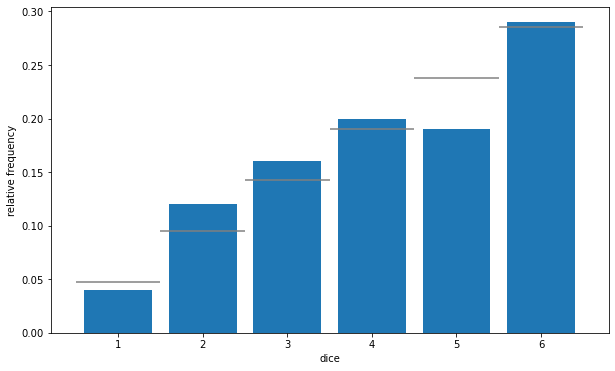

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률 분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프의 [1.5,2.5,...,6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

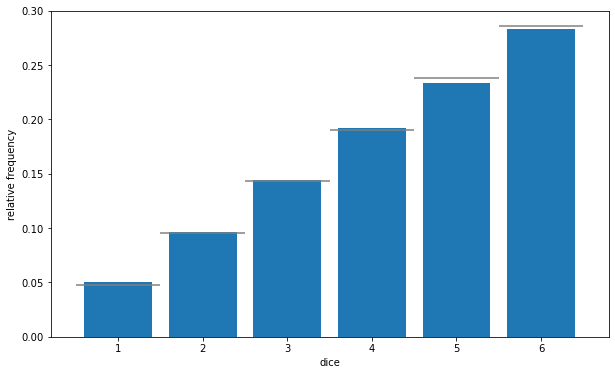

In [22]:
# 10,000번을 시행
num_trial = 10000
sample = np.random.choice(dice,size=num_trial,p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률 분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프의 [1.5,2.5,...,6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show() # 시행 횟수를 점점 늘리면 상대도수는 확률분포로 수렴되어 감

#### 3. 추측통계의 확률
'''추측통계에서도 무작위추출을 확률모형으로 기술할 수 있고, 
무작위추출로 얻은 표본은 모집단의 확률분포를 따르느느 확률변수로 간주할 수 있다.
따라서 추측통계에서 다루는 데이터는 그와 같은 확률변수의 실현값이라고 생각할 수 있다.
'''
* 주사위의 상대도수가 시행 횟수를 늘리면 실제의 확률분포에 가까워졌음
* 마찬가지로 무작위추출에서도 표본의 크기가 커지면, 표본 데이터의 상대도수는 실제의 확률분포에 가까워짐
* 표본 하나하나가 확률변수이므로, 표본들의 평균으로 계산되는 표본평균도 역시 확률변수임

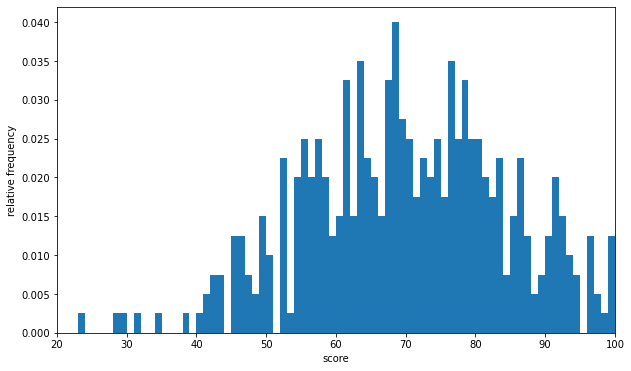

In [23]:
# score의 계급폭을 1점으로 하여 히스토그램 그리기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

* 69점을 얻은 학생은 전교생의 0.04를 차지하고 있음을 알 수 있음
* 즉 무작위추출을 수행하면 4%의 확률로 69점이라는 표본 데이터를 얻게 됨
* 표본 데이터: 표본의 실현값

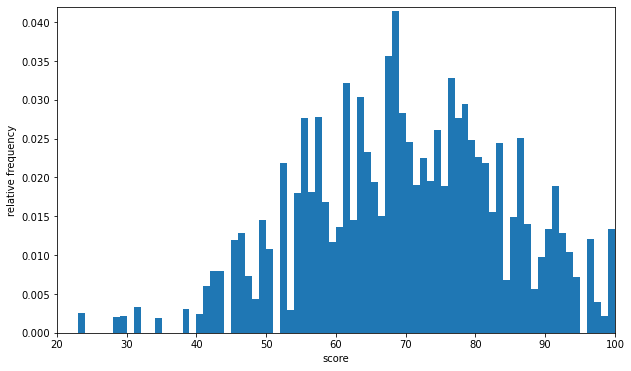

In [26]:
# 무작위추출로 샘플 사이즈가 10000인 표본 추출
sample = np.random.choice(scores,10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

* 히스토그램이 실제의 점수 분포에 매우 가까운 형태임을 알 수 있음
* 표본의 크기가 커지면, 실제의 분포에 수렴

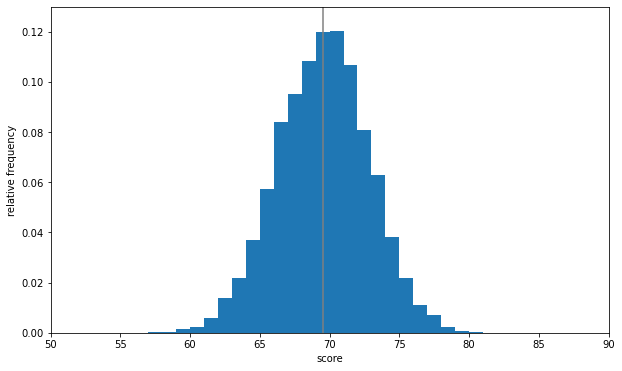

In [28]:
# 무작위추출로 표본 크기가 20인 표본을 추추라여 표본평균을 계산하는 작업을 10000번 수행
sample_means = [np.random.choice(scores,20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1,'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

* 표본평균은 산포도 그 자체이므로, 모평균을 중심으로 분포하는 것을 알 숭 있음
* 무작위추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거